In [6]:
import os
import sys
sys.path.append('..')
import cv2
import numpy as np
import matplotlib.pyplot as plt

from testing.test_utils.model import create_model
from testing.test_utils.utils_vis import show_mask
from testing.test_utils.custom_segment_anything import SamPredictor

In [7]:
# create model
sam_type, sam_ckpt = 'vit_l', 'pretrained_weights/nsclc_full_large/checkpoint.pth'
sam = create_model(sam_type, sam_ckpt, encoder_type='timm', lora=False, r=1, enable_lora=[True, True, True])
sam = sam.to('cuda')

validation: 0.6873589736550368 at 34 epoch.


/home/chuizhao/.conda/envs/p2sam/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


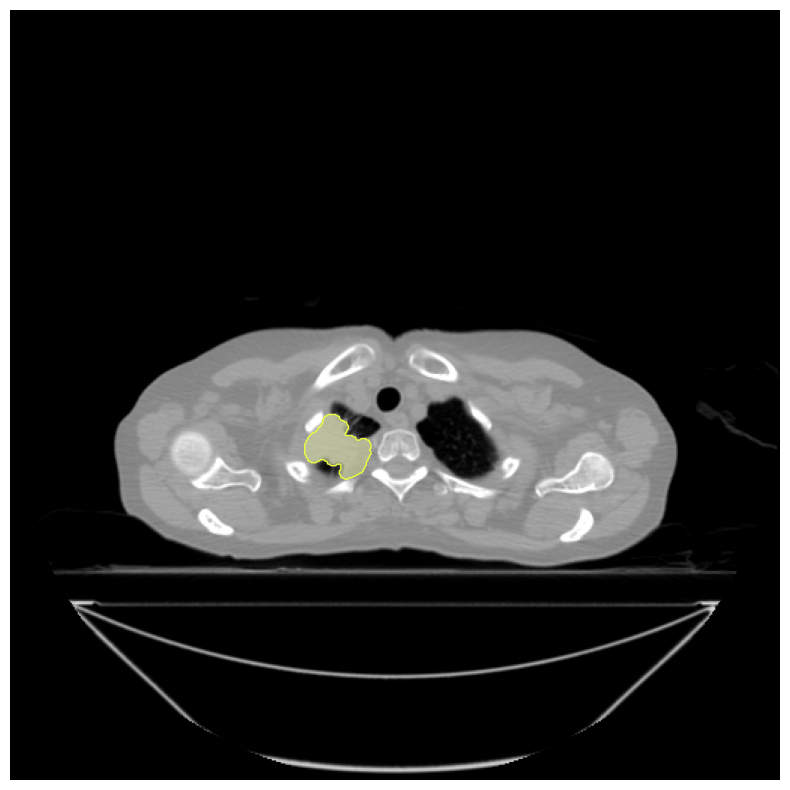

In [8]:
# load image
test_image = cv2.imread('images/test_image.png')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
if os.path.exists('images/test_mask.png'):
    test_mask = cv2.imread('images/test_mask.png', cv2.IMREAD_GRAYSCALE)       
    test_mask = test_mask - (test_mask.max()+test_mask.min()) / 2.0
    test_mask = (test_mask > 0.0).astype(np.float)
else:
    test_mask = None
plt.figure(figsize=(10, 10))
plt.imshow(test_image)
if test_mask is not None:
    show_mask(test_mask, plt.gca(), -1, linewidth=1) 
plt.axis('off')
plt.show()

In [9]:
# forward
sam.eval()
predictor = SamPredictor(sam)
predictor.set_image(test_image, medsam=False)
masks, _, _, _, _, _ = predictor.predict(
    point_coords=None, 
    point_labels=None, 
    box=None,
    multimask_output=False,
    attn_sim=None,  
    target_embedding=None 
)
best_idx = 0
final_mask = masks[best_idx]

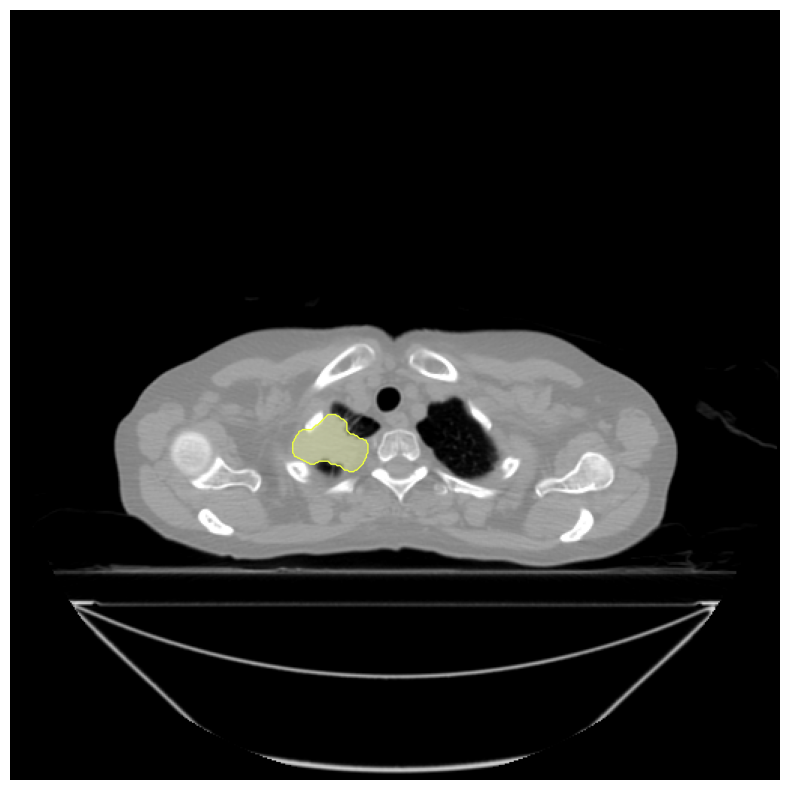

In [10]:
# plot prediction
plt.figure(figsize=(10, 10))
plt.imshow(test_image)
show_mask(final_mask, plt.gca(), -1, linewidth=1) 
plt.axis('off')
plt.show()